In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/gacho/Desktop/서예빈/ESS/도전/2107.csv')
df

FileNotFoundError: ignored

In [ ]:
df['temp']=(df['maxTemp']+df['minTemp'])/2
df.index = pd.to_datetime(df['date'])
df=df.drop(['maxTemp','minTemp','date'],axis=1)
df

,soc,dcA,dcV,nowKw,temp
date,,,,,
2021-07-01 00:00:00,8.0,0.0,652.0,0.0,21.5
2021-07-01 00:01:00,8.0,0.0,652.1,0.0,21.5
2021-07-01 00:02:00,8.0,0.0,652.0,0.0,21.5
2021-07-01 00:03:00,8.0,0.1,652.0,0.0,21.5
2021-07-01 00:04:00,8.0,0.0,652.0,0.0,21.5
...,...,...,...,...,...
2021-07-31 23:55:00,9.0,-0.1,653.2,0.0,20.5
2021-07-31 23:56:00,9.0,0.0,653.2,0.0,20.5
2021-07-31 23:57:00,9.0,-0.1,653.2,0.1,20.5


In [ ]:
df['P']=df['dcA']*df['dcV']
df

,soc,dcA,dcV,nowKw,temp,P
date,,,,,,
2021-07-01 00:00:00,8.0,0.0,652.0,0.0,21.5,0.00
2021-07-01 00:01:00,8.0,0.0,652.1,0.0,21.5,0.00
2021-07-01 00:02:00,8.0,0.0,652.0,0.0,21.5,0.00
2021-07-01 00:03:00,8.0,0.1,652.0,0.0,21.5,65.20
2021-07-01 00:04:00,8.0,0.0,652.0,0.0,21.5,0.00
...,...,...,...,...,...,...
2021-07-31 23:55:00,9.0,-0.1,653.2,0.0,20.5,-65.32
2021-07-31 23:56:00,9.0,0.0,653.2,0.0,20.5,0.00
2021-07-31 23:57:00,9.0,-0.1,653.2,0.1,20.5,-65.32


In [ ]:
df['nowKw']=(-1)*df['nowKw']
df

,soc,dcA,dcV,nowKw,temp,P
date,,,,,,
2021-07-01 00:00:00,8.0,0.0,652.0,-0.0,21.5,0.00
2021-07-01 00:01:00,8.0,0.0,652.1,-0.0,21.5,0.00
2021-07-01 00:02:00,8.0,0.0,652.0,-0.0,21.5,0.00
2021-07-01 00:03:00,8.0,0.1,652.0,-0.0,21.5,65.20
2021-07-01 00:04:00,8.0,0.0,652.0,-0.0,21.5,0.00
...,...,...,...,...,...,...
2021-07-31 23:55:00,9.0,-0.1,653.2,-0.0,20.5,-65.32
2021-07-31 23:56:00,9.0,0.0,653.2,-0.0,20.5,0.00
2021-07-31 23:57:00,9.0,-0.1,653.2,-0.1,20.5,-65.32


In [ ]:
print(df['dcA'][0],df['dcA'][44639])

0.0 -0.1


In [ ]:
for i in range(len(df)):
    if df['dcA'][i] >= -0.1 and df['dcA'][i] < 11.2:
        df['dcA'][i] = 0
df

,soc,dcA,dcV,nowKw,temp,P
date,,,,,,
2021-07-01 00:00:00,8.0,0.0,652.0,-0.0,21.5,0.00
2021-07-01 00:01:00,8.0,0.0,652.1,-0.0,21.5,0.00
2021-07-01 00:02:00,8.0,0.0,652.0,-0.0,21.5,0.00
2021-07-01 00:03:00,8.0,0.0,652.0,-0.0,21.5,65.20
2021-07-01 00:04:00,8.0,0.0,652.0,-0.0,21.5,0.00
...,...,...,...,...,...,...
2021-07-31 23:55:00,9.0,0.0,653.2,-0.0,20.5,-65.32
2021-07-31 23:56:00,9.0,0.0,653.2,-0.0,20.5,0.00
2021-07-31 23:57:00,9.0,0.0,653.2,-0.1,20.5,-65.32


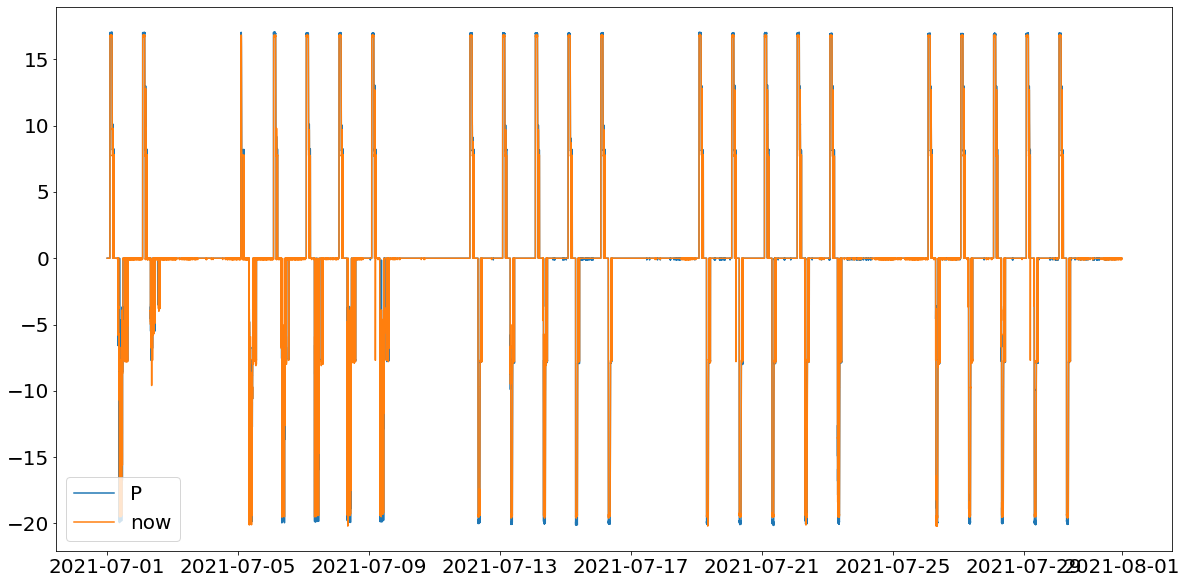

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['dcA']*df['dcV']/1000,label='P')
plt.plot(df['nowKw'],label='now')
plt.plot(df['temp']-23)
plt.legend()

In [ ]:
d=[0]
for i in range(len(df['soc'])-1):
    d += [(df['soc'][i+1]-df['soc'][i])*119.7/100]
df['d']=d

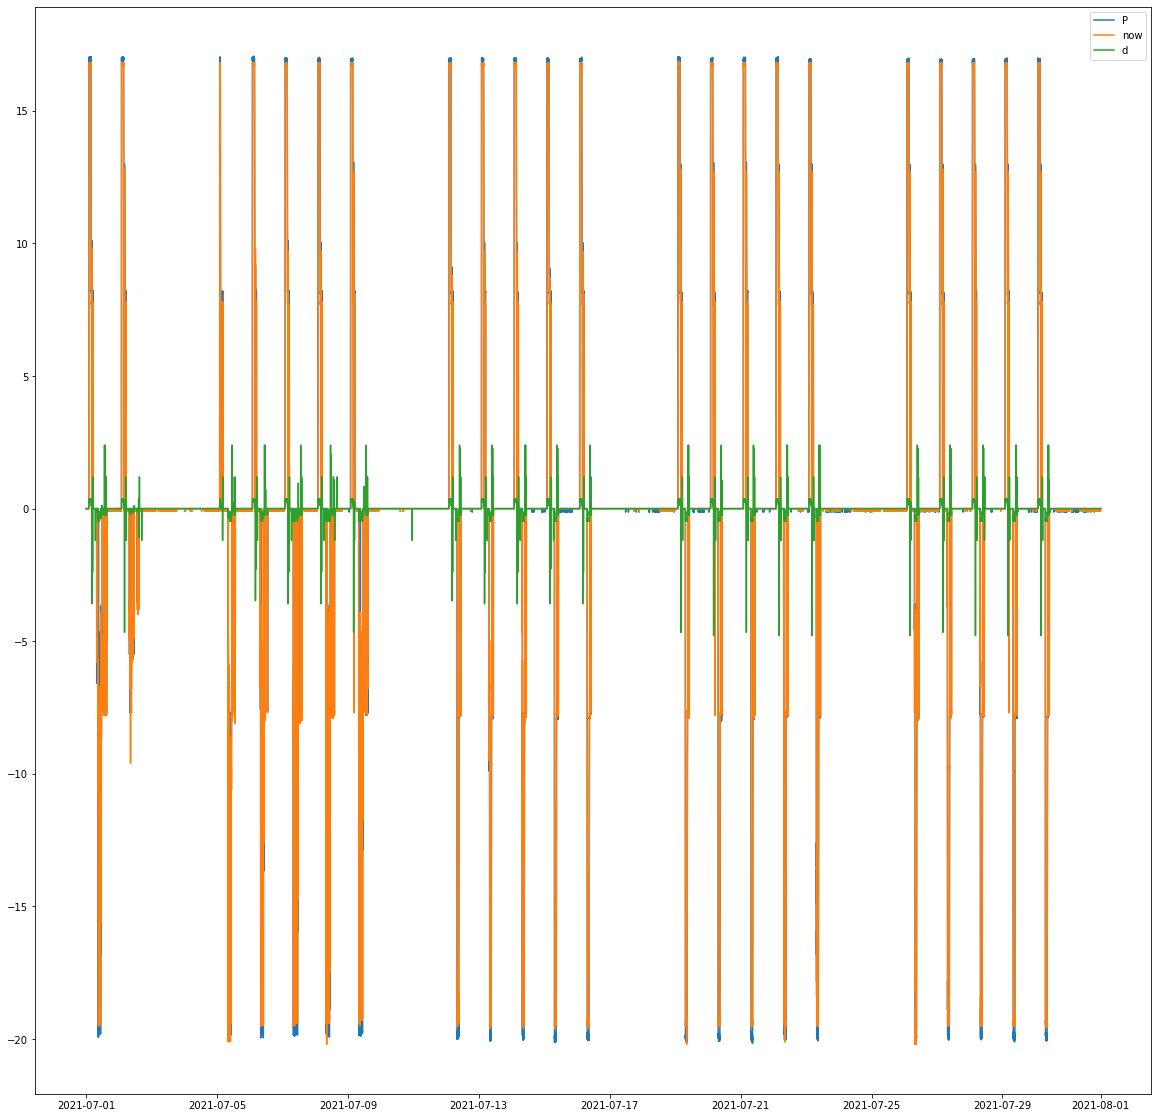

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(df['dcA']*df['dcV']/1000,label='P')
plt.plot(df['nowKw'],label='now')
plt.plot(df['d'],label='d')
plt.legend()

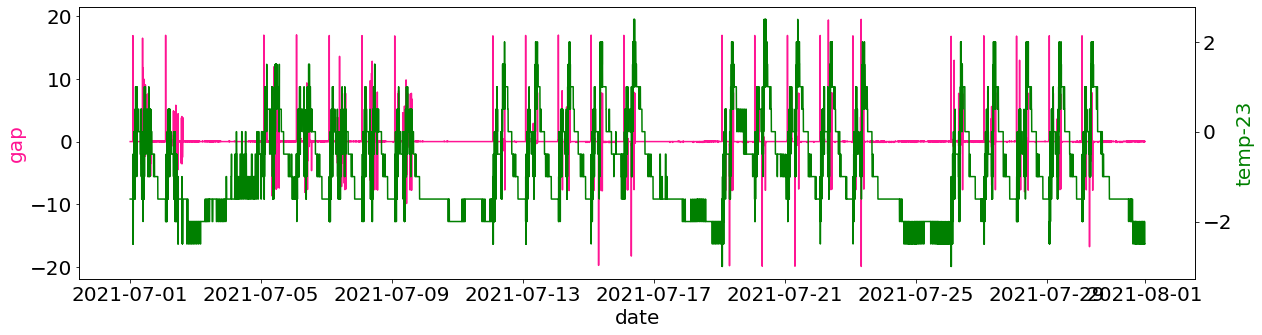

In [ ]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['font.size'] = 20
fig,ax1=plt.subplots()
#ax1.set_title('순시전력 = 현재 배터리%의 기울기')
ax1.plot(df.index,(df['dcA']*df['dcV']/1000)-df['nowKw'],color='deeppink')
ax1.set_xlabel('date')
ax1.set_ylabel('gap',color='deeppink')
ax2=ax1.twinx()
ax2.plot(df.index,df['temp']-23,color='green')
ax2.set_ylabel('temp-23',color='green')
plt.show()

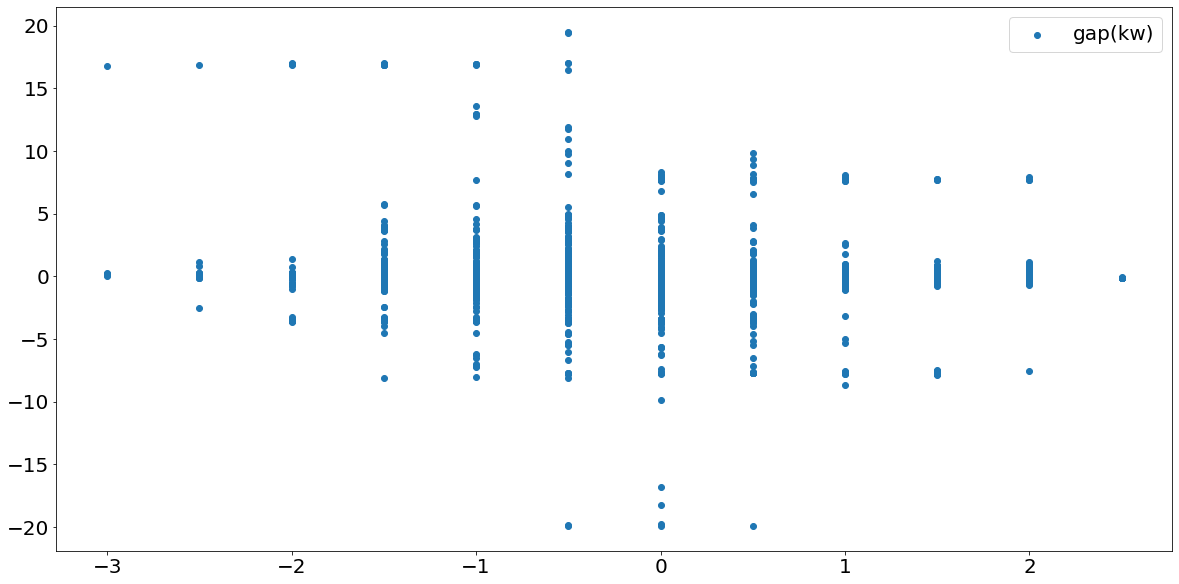

In [ ]:
plt.figure(figsize=(20,10))
plt.title
plt.scatter(df['temp']-23,(df['dcA']*df['dcV']/1000)-df['nowKw'],label='gap(kw)')
plt.legend()